# Week 06 SVM Lab

- Course: Z604 Music Data Mining 
- Instructor: Kahyun Choi 

### Reference
- Textbook Chapter 5 notebook

## Setup

In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

## Effect of Regularization to Logistic Regression

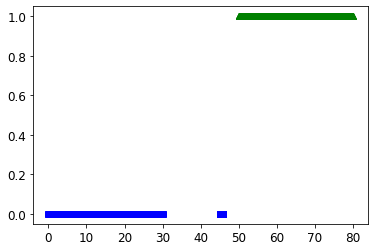

In [ ]:
numOutlier=10
X=np.hstack((np.linspace(0, 30, 1000), np.linspace(45,46, numOutlier), np.linspace(50, 80, 1000)))
y=np.hstack((np.zeros(1000, dtype=int),np.zeros(numOutlier, dtype=int),np.ones(1000, dtype=int)))
X = X.reshape(-1, 1)
y = y.reshape(-1)

plt.figure()
plt.plot(X[:1000+numOutlier], y[:1000+numOutlier], "bs", X[1000+numOutlier:], y[1000+numOutlier:], "g^")
plt.show()

LogisticRegression(random_state=42)
The linear model is: t = -79.866 + 1.6789*X
-theta0/theta1: 47.6
decision_boundary: 47.6


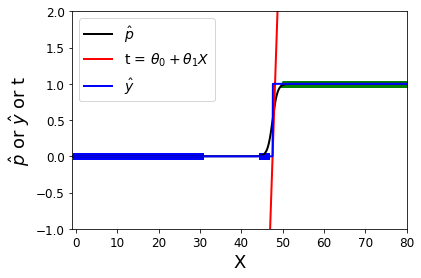

LogisticRegression(C=0.0001, random_state=42)
The linear model is: t = -6.0148 + 0.14831*X
-theta0/theta1: 40.6
decision_boundary: 40.6


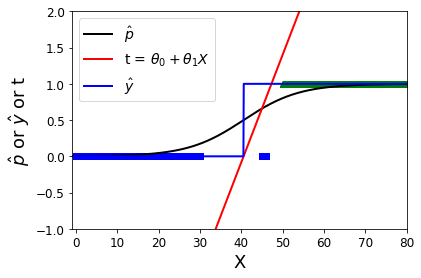

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression without regularization
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
# logistic regression with regularization
log_reg_reg = LogisticRegression(solver = 'lbfgs',random_state=42,  penalty='l2',C=.0001)
log_regs = [log_reg, log_reg_reg]

for log_reg in log_regs:
    
    log_reg.fit(X, y)
    print(log_reg)
    print("The linear model is: t = {:.5} + {:.5}*X".format(log_reg.intercept_[0], log_reg.coef_[0][0]))
    print("-theta0/theta1: {0:0.1f}".format(-1*log_reg.intercept_[0]/log_reg.coef_[0][0]))

    # observations
    plt.plot(X[:1000+numOutlier], y[:1000+numOutlier], "bs", X[1000+numOutlier:], y[1000+numOutlier:], "g^")
    
    # probability scores and the decision boundary
    X_new = np.linspace(-1, 80, 1000).reshape(-1, 1)
    y_proba = log_reg.predict_proba(X_new)
    plt.plot(X_new, y_proba[:,1], "k-", linewidth=2, label="$\hat{p}$")
    decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
    print("decision_boundary: {0:0.1f}".format(decision_boundary[0]))    

    # the linear model
    t_predict = log_reg.coef_[0][0]*X_new + log_reg.intercept_[0]
    plt.plot(X_new, t_predict, "r-", linewidth=2, label="t = $\\theta_{0}+\\theta_{1} X}$")
    
    # class predictions
    y_predict = log_reg.predict(X_new)
    plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")
    
    # x and y labels
    plt.xlabel("X", fontsize=18)
    plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)

    plt.axis([-1, 80, -1, 2])
    plt.legend(loc="upper left", fontsize=14)

    plt.show()

## Hinge Loss

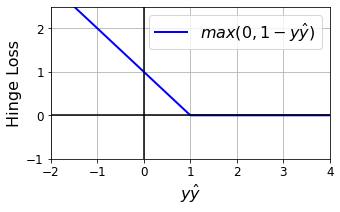

In [ ]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t) Return elements chosen from x or y depending on condition.

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - y \hat{y})$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$y \hat{y}$", fontsize=16)
plt.ylabel("Hinge Loss", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

## SVM for Binary Classification

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


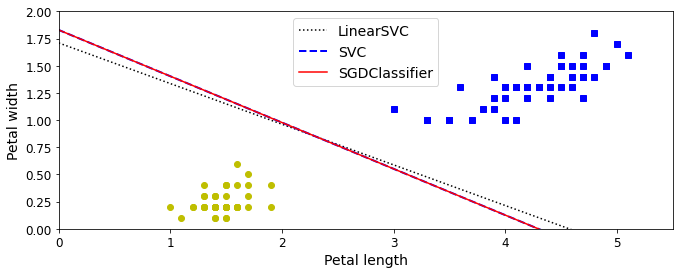

In [ ]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## SVM for Multiclass Classification

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
alpha = 1

sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=1, eta0=0.001, learning_rate='constant', random_state=42,
              tol=-inf)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9101034208432777

In [ ]:
y_pred = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.912962962962963

## Hyperparameter Tuning

In [ ]:
# Instantiate an RBF SVM
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, 
                        max_iter=1000, tol=-np.infty, random_state=42)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
from sklearn.model_selection import GridSearchCV
searcher = GridSearchCV(sgd_clf, parameters, cv = 3)
searcher.fit(X_train_scaled,y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'alpha': 0.01}


In [ ]:
alpha = searcher.best_params_['alpha']

sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.01, eta0=0.001, learning_rate='constant', random_state=42,
              tol=-inf)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9785202863961814

In [ ]:
y_pred = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9666666666666667

## Non-linear classification

### 9 observations

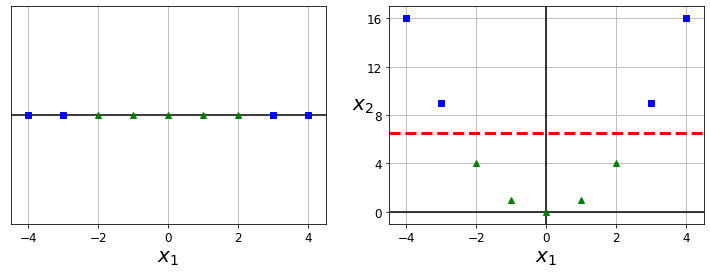

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

### 90 observations

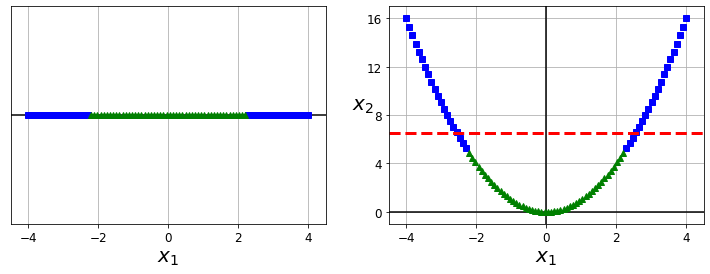

In [ ]:
X1D = np.linspace(-4, 4, 90).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
#y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
y = np.hstack((np.zeros(20, dtype=int),np.ones(50, dtype=int),np.zeros(20, dtype=int)))
y = y.reshape(-1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(40), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(50), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

### Linear SVM for the linear not seperable case

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1D,y,test_size=0.3,random_state=42)

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
# Instantiate an SVM
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, 
                        max_iter=1000, tol=-np.infty, random_state=42)

# Instantiate the GridSearchCV object and run the search
alpha_range = np.logspace(-10, 2, 13)
param_grid = dict(alpha=alpha_range)

from sklearn.model_selection import GridSearchCV
searcher = GridSearchCV(sgd_clf, param_grid=param_grid, cv = 3)
searcher.fit(X_train_scaled,y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

alpha = searcher.best_params_['alpha']

sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

Best CV params {'alpha': 0.01}


SGDClassifier(alpha=0.01, eta0=0.001, learning_rate='constant', random_state=42,
              tol=-inf)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.5396825396825397

In [ ]:
y_pred = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5925925925925926

### Non-linear SVM for the non-linear classification
- Finding C and gamma using GridSearchCV

In [ ]:
from sklearn.svm import SVC

# Instantiate a RBF SVM
svm_clf = SVC(kernel="rbf")

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

from sklearn.model_selection import GridSearchCV
searcher = GridSearchCV(svm_clf, param_grid=param_grid, cv = 3)
searcher.fit(X_train_scaled,y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

gamma = searcher.best_params_['gamma']
C = searcher.best_params_['C']

svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)
svm_clf.fit(X_train_scaled, y_train)

Best CV params {'C': 1000.0, 'gamma': 0.1}


SVC(C=1000.0, gamma=0.1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9841269841269841

In [ ]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

1.0